In [119]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [120]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
from mordred import Calculator, descriptors, CPSA
from openbabel import pybel
import openbabel as ob

In [121]:
sns.set_style("ticks", {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.0})

from pylab import *
rc('axes', linewidth=1.0)
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 1

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [122]:
#df_2 = pd.read_csv('df_fin_path_1024_1_fin.csv')
df_2 = pd.read_csv('df_fin_morgan_4096_1_fin.csv')
#df_2 = pd.read_csv('df_fin_MACCS_new.csv')
df_smiles = pd.read_csv('new_list_2.csv', index_col='no')
df_3 = pd.read_csv('compound_rejections_3_temp.csv', encoding='cp1252')

In [108]:
df_2

,Type of MB,Types of contaminants,pH,MB MWCO (Da),MB contact angle,Pressure (kPa),Measurement time (min),Initial concentration of compound (mg/L),removal rate (%),1,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
0,AK,2(2butoxyethoxy)ethanol,7.0,150,50.0,800.0,10.0,0.16223,81.59,0,...,0,0,0,0,0,0,0,0,0,0
1,AK,caprolactam,7.0,150,50.0,800.0,10.0,0.11316,82.85,0,...,0,0,0,0,0,0,0,0,0,0
2,AK,creatine,7.0,150,50.0,800.0,10.0,0.13114,96.65,0,...,0,0,0,0,0,0,0,0,0,0
3,AK,formaldehyde,7.0,150,50.0,800.0,10.0,0.03003,3.35,0,...,0,0,0,0,0,0,0,0,0,0
4,AK,isopropanol,7.0,150,50.0,800.0,10.0,0.06010,65.27,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1901,XLE440,trichloroethylene,8.0,150,39.8,410.0,2880.0,0.10000,3.00,0,...,0,0,0,0,0,0,0,0,0,0
1902,XLE440,chloroform,8.0,150,39.8,410.0,10.0,0.10000,10.00,0,...,0,0,0,0,0,0,0,0,0,0
1903,XLE440,carbontetrachloride,8.0,150,39.8,410.0,10.0,0.10000,69.00,0,...,0,0,0,0,0,0,0,0,0,0
1904,XLE440,perchloroethylene,8.0,150,39.8,410.0,10.0,0.10000,71.00,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
#df_2 = df_2[df_2['MB MWCO (Da)'] <= 118]
df_2 = df_2[df_2['MB MWCO (Da)'] >= 340]

In [80]:
#df_2 = df_2[df_2['MB MWCO (Da)'] <= 150]
df_2 = df_2[df_2['MB MWCO (Da)'] <= 190]
#df_2 = df_2[df_2['MB MWCO (Da)'] >= 310]

In [124]:
pd.unique(df_2['Type of MB'])

array(['DF30', 'NF270', 'NF70', 'SR2'], dtype=object)

In [111]:
df_2

,Type of MB,Types of contaminants,pH,MB MWCO (Da),MB contact angle,Pressure (kPa),Measurement time (min),Initial concentration of compound (mg/L),removal rate (%),1,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
7,BW30,17alphaethynilestradiol,7.0,100,76.0,2000.0,10.0,1.48205,98.520,0,...,0,0,0,0,0,0,0,0,0,0
8,BW30,4chlorophenol,7.0,100,76.0,2000.0,10.0,0.64280,82.760,0,...,0,0,0,0,0,0,0,0,0,0
9,BW30,acetaminophen,4.0,100,59.8,1000.0,10.0,0.50000,92.590,0,...,0,0,0,0,0,0,0,0,0,0
10,BW30,acetaminophen,5.0,100,59.8,1000.0,10.0,0.50000,93.780,0,...,0,0,0,0,0,0,0,0,0,0
11,BW30,acetaminophen,7.0,100,59.8,1000.0,10.0,0.50000,89.530,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,XLE,mcpa,7.0,96,75.8,1000.0,10.0,10.00000,93.587,0,...,0,0,0,0,0,0,0,0,0,0
1887,XLE,mecoprop,7.0,96,75.8,1000.0,10.0,0.00100,95.012,0,...,0,0,0,0,0,0,0,0,0,0
1888,XLE,mecoprop,7.0,96,75.8,1000.0,10.0,1.00000,93.349,0,...,0,0,0,0,0,0,0,0,0,0
1889,XLE,mecoprop,7.0,96,75.8,1000.0,10.0,5.00000,92.874,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
list_temp = []
df_temp = pd.DataFrame()

for i in range(len(df_smiles)):
    c = df_smiles['compound'].iloc[i]
    for j in range(len(df_2)):
        if c == df_2['Types of contaminants'].iloc[j]:
            res = df_2['removal rate (%)'].iloc[j]
            list_temp.append(res)
    
    mean_val = np.mean(list_temp)
    std_val = np.std(list_temp)
    mean_val = np.asarray(mean_val)
    std_val = np.asarray(std_val)
    print(c, mean_val, std_val)
    c = np.asarray(c)
    temp = pd.DataFrame([[c, mean_val]], columns=['name', 'rej'])
    df_temp = pd.concat([df_temp, temp], axis=0)
    list_temp = []

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

2(2butoxyethoxy)ethanol nan nan
caprolactam 71.2 0.0
creatine nan nan
formaldehyde nan nan
isopropanol 76.4 0.0
methanol 10.8 0.0
urea nan nan
17alphaethynilestradiol 27.9 0.0
4chlorophenol nan nan
acetaminophen 38.0928 27.57593585284097
atrazine 73.79 0.0
caffeine 56.9 32.02634332337469
carbamazepine 52.406499999999994 29.54729661153453
diclofenac 93.90499999999999 0.3059509764651829
dipyrone nan nan
ibuprofen 78.37791666666666 25.443628382034184
nnitrosodiethylamine nan nan
nnitrosodimethylamine nan nan
nnitrosomethylethylamine nan nan
nnitrosopyrrolidine nan nan
perfluorooctanesulfonate 93.05178571428571 10.281146424948167
phenol 47.7 0.0
sulfamethoxazole 59.4138 31.085002408878786
bromoform nan nan
dexamethasone 99.1875 0.3139964171770124
hydrocortisone 89.64857142857143 6.402395597567764
lidocaine 59.01428571428572 2.6803137190733968
procaine 50.55714285714286 7.96740810030054
aceticacid nan nan
benzylalcohol 76.7 0.0
ethylalcohol nan nan
ethyleneglycol nan nan
glucose 84.75399999

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

primidone nan nan
phenacetine nan nan
trichloroaceticacid 33.732 0.0
aminopyrine nan nan
atenolol 62.0 0.0
bezafibrate nan nan
clenbuterol nan nan
cyclophosphamide nan nan
clofibricacid 93.473 0.0
ciprofloxacin 96.76433333333334 2.3244584076487325
febantel 100.0 0.0
fenoprofen nan nan
gemfibrozil 66.21666666666667 39.25644827993938
ketoprofen nan nan
metoprolol 83.46833333333333 3.1690964362452325
naproxen 93.38900000000001 6.610999999999997
pindolol nan nan
phenazone nan nan
propanolol 79.916 9.204999999999998
pentoxifylline 94.0 0.0
salbutamol nan nan
sotalol nan nan
terbutaline nan nan
trimethoprim 60.8811111111111 10.713167852325416
chloroform nan nan
carbontetrabromide nan nan
carbontetrachloride nan nan
dichloroaceticacid 26.834 0.0
perchloroethylene nan nan
trichloroethylene nan nan
albendazole 61.4 12.467557900406959
procainehydrochloride 33.85333333333333 8.036638324296767
sulfaguanidine 10.961666666666666 3.013969788980787
17betaestradiol 14.9 0.0
2,4dihydroxybenzoicacid nan 

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

4methyl3nitrophenol nan nan
3,5dihydroxybenzoicacid nan nan
4chloro3nitrobenzaldehyde nan nan
2,4dichlorophenol nan nan
4hydroxybenzoicacid nan nan
butyricacid nan nan
cinnamicacid nan nan
diphenylaminosulfonicacid nan nan
glutamine nan nan
isoleucine nan nan
janusgreen nan nan
methyleneblue nan nan
methylorange nan nan
nonylphenol nan nan
phenylalanine nan nan
propanoicacid nan nan
serine nan nan
crotamiton nan nan
propyphenazone nan nan
isoproturon nan nan
chlortoluron nan nan
diuron nan nan
methylparaben 22.0 0.0
norfloxacin 92.71083333333333 3.545161510973636
ofloxacin 95.0 0.0
boricacid nan nan
2butanol nan nan
1butanol nan nan
tryptophane nan nan
thymol nan nan
1,2ethanediol nan nan
1,3propandiol nan nan
1,4butanediol nan nan
1,5pentanediol nan nan
mannitol nan nan
dilantin 89.0 0.0
diatrizoate 93.0 0.0
chloramphenicol 92.88999999999999 5.100593364175059
9anthracenecarboxylicacid nan nan
salicylicacid nan nan
1,5naphthalenedisulfonicacid nan nan
2naphthalenesulfonicacid nan nan
2

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

2,6dichlorobenzamide 30.10675 2.0390723840756606
mcpa 60.33275 21.571572698519226
mecoprop 71.1995 14.36154660020988
antipyrine nan nan
bentazon nan nan
chlorotoluron nan nan
metobromuron nan nan
monolinuron nan nan
metoxuron nan nan
simazine nan nan
nizatidine 90.962 0.0
ampicillin 87.0295 5.606499999999997
cephalexinhydrate 93.8075 1.0045000000000002
diltiazem 94.1425 5.6905
erythromycin 97.155 2.6779999999999973
roxithromycin 98.5775 1.4224999999999994


C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

In [17]:
list_temp = []
df_temp = pd.DataFrame()

for i in range(len(df_smiles)):
    c = df_smiles['compound'].iloc[i]
    m = 'NF270' #'NF270' = NF , 'NF90' = RO
    for j in range(len(df_2)):
        if m == df_3['Type of MB'].iloc[j]:
            if c == df_3['Types of contaminants'].iloc[j]:
                res = df_3['removal rate (%)'].iloc[j]
                list_temp.append(res)
            
    mean_val = np.mean(list_temp)
    std_val = np.std(list_temp)
    mean_val = np.asarray(mean_val)
    std_val = np.asarray(std_val)
    #print(c, mean_val, std_val)
    c = np.asarray(c)
    temp = pd.DataFrame([[c, mean_val]], columns=['name', 'rej'])
    df_temp = pd.concat([df_temp, temp], axis=0)
    list_temp = []

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return

In [56]:
df_temp

,name,rej
0,2(2butoxyethoxy)ethanol,nan
0,caprolactam,nan
0,creatine,nan
0,formaldehyde,nan
0,isopropanol,nan
...,...,...
0,ampicillin,87.0295
0,cephalexinhydrate,93.8075
0,diltiazem,94.1425
0,erythromycin,97.155


In [61]:
ms1 = Chem.MolFromSmiles('CCOC')
ms2 = Chem.MolFromSmiles('C1CC(=O)NC(=O)C1N2C(=O)C3=CC=CC=C3C2=O')
fps1 = Chem.RDKFingerprint(ms1, fpSize=512)
fps2 = Chem.RDKFingerprint(ms2, fpSize=512)
s = DataStructs.TanimotoSimilarity(fps1, fps2)
print(s)

0.02304147465437788


In [7]:
mol = Chem.MolFromSmiles("c1ccccc1O")
fp = Chem.RDKFingerprint(mol)
txt = fp.ToBinary()
fp2 = DataStructs.ExplicitBitVect(txt)
print(fp, txt, fp2)

<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002840EA28F80> b'\xe0\xff\xff\xff\x00\x08\x00\x00&\x00\x00\x00hdr\x10.\x1a\xaaF\t\x00\x12!\x00N=\x00X\x08\x0c\x8e<\x02\x08\x84M\x01`l(\x0e8db\xaa\xb0\x10xJ\x80N"\x84\x92' <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000002840E6BE1F0>


In [58]:
a = DataStructs.cDataStructs.BitVectToText(fp)
#b = DataStructs.cDataStructs.CreateFromBinaryText(a)
#b = DataStructs.cDataStructs.CreateFromBitString(a)
b = DataStructs.cDataStructs.CreateFromFPSText(a)

In [126]:
txt = df_smiles['SMILES'].iloc[188] #nitrobenzene 125, methylparaben 188, phenol=21, 1,5pentanediol = 200, 2butanol = 193, 189 norfloxacin, ofloxacin = 191, urea = 6, 17 = NDMA, 176 janus green, 206, 136 tetracycline 
query = Chem.MolFromSmiles(txt) #('C1=CC=CC=C1')
#query_fp = Chem.RDKFingerprint(query, fpSize=1024, minPath=1, maxPath=1)
query_fp = AllChem.GetMorganFingerprintAsBitVect(query, radius=1, nBits=4096)
#query_fp = MACCSkeys.GenMACCSKeys(query)

# m = pcp.get_compounds(txt, 'smiles')
# fp = m[0].cactvs_fingerprint #bin(int(m[0].fingerprint, 16))
# query_fp = DataStructs.cDataStructs.CreateFromBitString(fp)


In [127]:
fp_list = []
for i in range(len(df_smiles)):
    name = df_smiles['compound'].iloc[i]
    txt = df_smiles['SMILES'].iloc[i]
    
    m = Chem.MolFromSmiles(txt)
    #fp = Chem.RDKFingerprint(m, fpSize=1024, minPath=1, maxPath=1)
    fp = AllChem.GetMorganFingerprintAsBitVect(m, radius=1, nBits=4096)
    #fp = MACCSkeys.GenMACCSKeys(m)
    
#     m = pcp.get_compounds(txt, 'smiles')
#     fp = m[0].cactvs_fingerprint #bin(int(m[0].fingerprint, 16))
#     fp = DataStructs.cDataStructs.CreateFromBitString(fp)
    
    fp_list.append([name, fp])
    
fp_list = pd.DataFrame(fp_list, columns=['name', 'fp'])
s = DataStructs.BulkTanimotoSimilarity(query_fp, fp_list['fp'])
#s = DataStructs.BulkTanimotoSimilarity(ref_fp_bitvect, fp_list['fp'])
s = pd.DataFrame(s, columns=['tani'])
fp_list = pd.concat([s, fp_list], axis=1)

In [11]:
fp_list.to_csv('fp_list.csv')  

In [21]:
fp_list = pd.read_csv('fp_list.csv')
fp_list.drop(columns=['Unnamed: 0'], inplace=True)

In [29]:
# Path-based or Circular

sum_list = []

for i in range(len(df_smiles)):
    name_1 = df_smiles['compound'].iloc[112] # 48 gemfibrozil, 112 benzoicacid, 142 monomethylphtalate, 180 phenylalanine, 190 ofloxacin
    txt = df_smiles['SMILES'].iloc[112] 
#     name_1 = df_smiles['compound'].iloc[i]
#     txt = df_smiles['SMILES'].iloc[i] #1,5pentanediol = 200, 2butanol = 193
    query = Chem.MolFromSmiles(txt) #('C1=CC=CC=C1')
#    query_fp = Chem.RDKFingerprint(query, fpSize=1024, minPath=1, maxPath=1)
    query_fp = AllChem.GetMorganFingerprintAsBitVect(query, radius=3, nBits=16384)
    
    fp_list = []
    for j in range(len(df_smiles)):
        name = df_smiles['compound'].iloc[j]
        text = df_smiles['SMILES'].iloc[j]
        m = Chem.MolFromSmiles(text)
#         fp = Chem.RDKFingerprint(m, fpSize=1024, minPath=1, maxPath=1)
        fp = AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=16384)
        fp_list.append([name, fp])

    fp_list = pd.DataFrame(fp_list, columns=['name', 'fp'])
    s = DataStructs.BulkTanimotoSimilarity(query_fp, fp_list['fp'])
    #print(name_1, txt, np.sum(s))
    print(i, name_1, np.sum(s))
    s = pd.DataFrame(s, columns=['tani'])
    
    fp_list = pd.concat([s, fp_list], axis=1)
    sum_list.append([name_1, np.sum(s).values[0]])

sum_df = pd.DataFrame(sum_list, columns=['name', 'sum_val'])
sum_df = sum_df.sort_values(by=['sum_val'], ascending=False)

0 benzoicacid 28.954105422839497
1 benzoicacid 28.954105422839497
2 benzoicacid 28.954105422839497
3 benzoicacid 28.954105422839497
4 benzoicacid 28.954105422839497
5 benzoicacid 28.954105422839497
6 benzoicacid 28.954105422839497
7 benzoicacid 28.954105422839497
8 benzoicacid 28.954105422839497
9 benzoicacid 28.954105422839497
10 benzoicacid 28.954105422839497
11 benzoicacid 28.954105422839497
12 benzoicacid 28.954105422839497
13 benzoicacid 28.954105422839497
14 benzoicacid 28.954105422839497
15 benzoicacid 28.954105422839497
16 benzoicacid 28.954105422839497
17 benzoicacid 28.954105422839497
18 benzoicacid 28.954105422839497
19 benzoicacid 28.954105422839497
20 benzoicacid 28.954105422839497
21 benzoicacid 28.954105422839497
22 benzoicacid 28.954105422839497
23 benzoicacid 28.954105422839497
24 benzoicacid 28.954105422839497
25 benzoicacid 28.954105422839497
26 benzoicacid 28.954105422839497
27 benzoicacid 28.954105422839497
28 benzoicacid 28.954105422839497
29 benzoicacid 28.954105

In [18]:
# collecting PubChem compound
pcp_compound_list = []

for i in range(len(df_smiles)):
    name_1 = df_smiles['compound'].iloc[i]
    txt = df_smiles['SMILES'].iloc[i]
    m = pcp.get_compounds(txt, 'smiles')
    pcp_compound_list.append(m)

In [31]:
# PubChem or MACCS

sum_list = []

for i in range(len(df_smiles)):
#for i in range(1):
    name_1 = df_smiles['compound'].iloc[41] # 2 creatine, 41 bezafibrate
    txt = df_smiles['SMILES'].iloc[41] 
#     name_1 = df_smiles['compound'].iloc[i]
#     txt = df_smiles['SMILES'].iloc[i] #1,5pentanediol = 200, 2butanol = 193
    m = Chem.MolFromSmiles(txt)
    query_fp = MACCSkeys.GenMACCSKeys(m)
#     m = pcp.get_compounds(txt, 'smiles')
#     query_fp = pcp_compound_list[180][0].cactvs_fingerprint #bin(int(m[0].fingerprint, 16))
#     query_fp = DataStructs.cDataStructs.CreateFromBitString(query_fp)
    
    fp_list = []
    for j in range(len(df_smiles)):
    #for j in range(3):
        name = df_smiles['compound'].iloc[j]
        text = df_smiles['SMILES'].iloc[j]
        m = Chem.MolFromSmiles(text)
        fp = MACCSkeys.GenMACCSKeys(m)
#         m = pcp.get_compounds(text, 'smiles')
#         fp = pcp_compound_list[j][0].cactvs_fingerprint #bin(int(m[0].fingerprint, 16))
#         fp = DataStructs.cDataStructs.CreateFromBitString(fp)
        fp_list.append([name, fp])
        
    fp_list = pd.DataFrame(fp_list, columns=['name', 'fp'])
    s = DataStructs.BulkTanimotoSimilarity(query_fp, fp_list['fp'])
    #print(name_1, txt, np.sum(s))
    print(i, name_1, np.sum(s))
    s = pd.DataFrame(s, columns=['tani'])
    
    fp_list = pd.concat([s, fp_list], axis=1)
    sum_list.append([name_1, np.sum(s).values[0]])

sum_df = pd.DataFrame(sum_list, columns=['name', 'sum_val'])
sum_df = sum_df.sort_values(by=['sum_val'], ascending=False)

0 bezafibrate 65.00283575418565
1 bezafibrate 65.00283575418565
2 bezafibrate 65.00283575418565
3 bezafibrate 65.00283575418565
4 bezafibrate 65.00283575418565
5 bezafibrate 65.00283575418565
6 bezafibrate 65.00283575418565
7 bezafibrate 65.00283575418565
8 bezafibrate 65.00283575418565
9 bezafibrate 65.00283575418565
10 bezafibrate 65.00283575418565
11 bezafibrate 65.00283575418565
12 bezafibrate 65.00283575418565
13 bezafibrate 65.00283575418565
14 bezafibrate 65.00283575418565
15 bezafibrate 65.00283575418565
16 bezafibrate 65.00283575418565
17 bezafibrate 65.00283575418565
18 bezafibrate 65.00283575418565
19 bezafibrate 65.00283575418565
20 bezafibrate 65.00283575418565
21 bezafibrate 65.00283575418565
22 bezafibrate 65.00283575418565
23 bezafibrate 65.00283575418565
24 bezafibrate 65.00283575418565
25 bezafibrate 65.00283575418565
26 bezafibrate 65.00283575418565
27 bezafibrate 65.00283575418565
28 bezafibrate 65.00283575418565
29 bezafibrate 65.00283575418565
30 bezafibrate 65.00

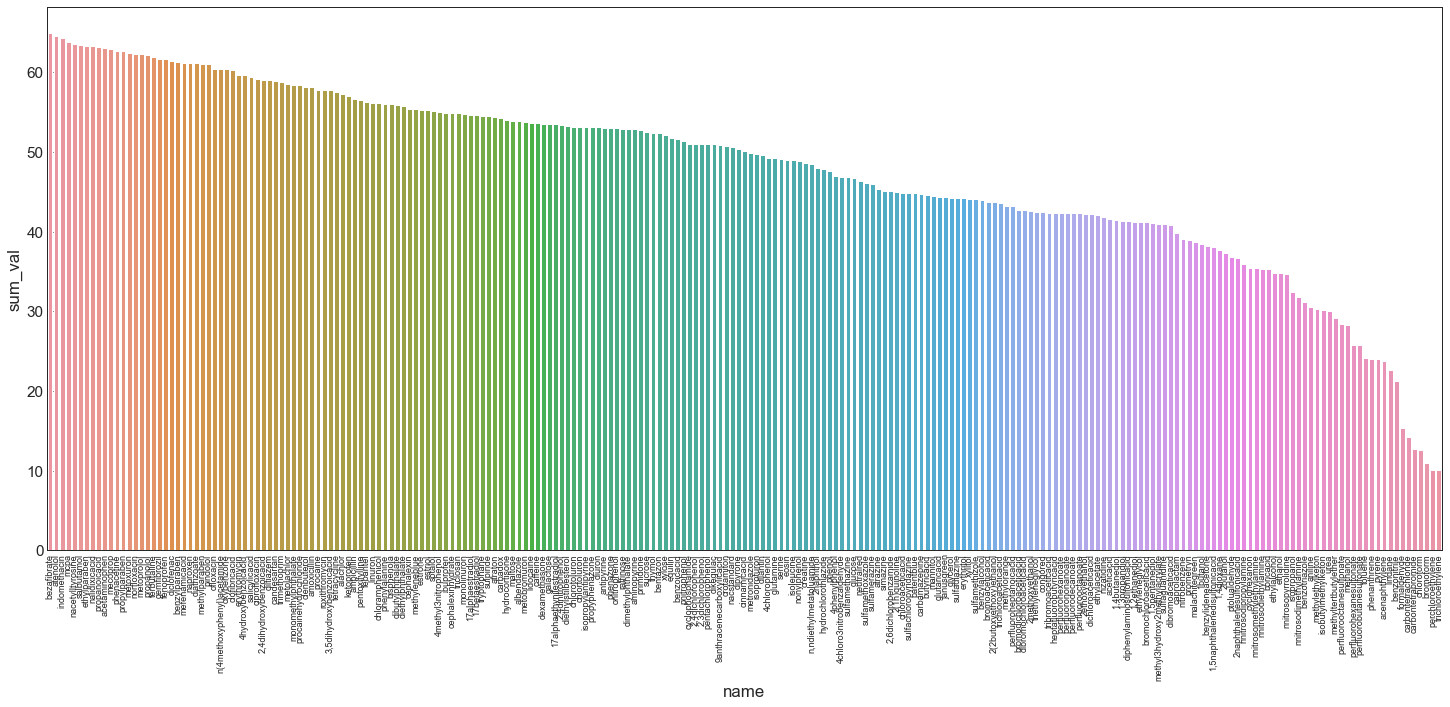

C:\Users\leesa\AppData\Local\Temp\ipykernel_12524\2989532482.py:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("fig_reference_molecule_sum_maccs.pdf", bbox_i6nches='tight', transparent=True)
meta NOT subset; don't know how to subset; dropped


In [30]:
fig = plt.figure(figsize=(25,10))
sns.barplot(x='name', y='sum_val', data=sum_df)
plt.xticks(fontsize=9, rotation = 90)
plt.show()
fig.savefig("fig_reference_molecule_sum_maccs.pdf", bbox_i6nches='tight', transparent=True)

In [11]:
df_temp

,name,rej
0,2(2butoxyethoxy)ethanol,81.59
0,caprolactam,82.85
0,creatine,96.65
0,formaldehyde,3.35
0,isopropanol,79.58500000000001
...,...,...
0,ampicillin,95.85775000000001
0,cephalexinhydrate,97.5523
0,diltiazem,97.9707
0,erythromycin,99.6862


In [128]:
fp_list.drop(columns=['fp'], inplace=True)
fp_list = fp_list.reset_index(drop=True)
df_temp = df_temp.reset_index(drop=True)
fp_list = pd.concat([fp_list, df_temp['rej']], axis=1)

In [129]:
fp_list

,tani,name,rej
0,0.130435,2(2butoxyethoxy)ethanol,nan
1,0.086957,caprolactam,71.2
2,0.185185,creatine,nan
3,0.058824,formaldehyde,nan
4,0.105263,isopropanol,76.4
...,...,...,...
224,0.205128,ampicillin,87.0295
225,0.195122,cephalexinhydrate,93.8075
226,0.230769,diltiazem,94.1425
227,0.111111,erythromycin,97.155


In [130]:
fp_list.to_csv('fp_list_Morgan_methylparaben_MWCO340.csv')

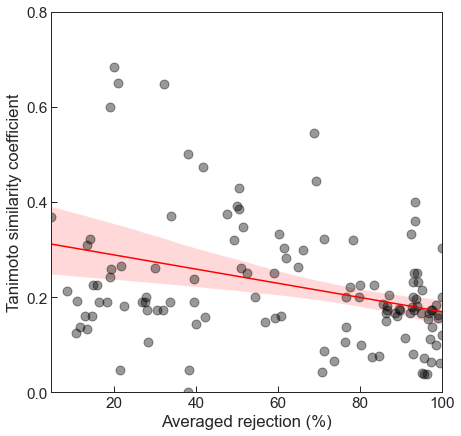

In [131]:
fig = plt.figure(figsize=(7,7))
fp_list['rej'] = fp_list['rej'].astype('float64')
fp_list['tani'] = fp_list['tani'].astype('float64')

sns.regplot(x='rej', y='tani', data=fp_list, ci=95, scatter=False, logistic=False, color='r')
#sns.regplot(fp_list['tani'], fp_list['rej'], scatter=False, logistic=True, color='r')
plt.scatter(fp_list['rej'], fp_list['tani'], c='k', alpha=0.4, s=80, edgecolors=None)
plt.xlabel('Averaged rejection (%)')
plt.ylabel('Tanimoto similarity coefficient')
plt.xlim(np.min(fp_list['rej']),100)
plt.ylim(0.0,0.8)
#plt.ylim(0,0.6)
plt.yticks(np.arange(0.0,0.801,0.2))
#plt.yticks(np.arange(0,0.601,0.1))
plt.show()
#fig.savefig("fig_similar_maccs_3d.pdf", bbox_inches='tight', transparent=True)